# 範例重點
學會從 Keras 內建函式取得資料 <br />
能夠建立簡易的深度學習模型<br />
觀察並了解 Overfit 現象<br />

In [7]:
import os
import keras

os.environ["CUD_VISIBLE_DEVICES"] = ""

In [8]:
train, test = keras.datasets.cifar10.load_data()

In [9]:
x_train, y_train = train
x_test, y_test = test

x_train = x_train/255.0
x_test = x_test/255.0

print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

print(x_train.shape)
print(x_test.shape)

y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 3072)
(10000, 3072)


In [10]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units = 512, activation = 'relu')(input_layer)
    x = keras.layers.Dense(units = 256, activation = 'relu')(x)
    x = keras.layers.Dense(units = 128, activation = 'relu')(x)
    out = keras.layers.Dense(units = 10, activation = 'softmax')(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    return model

In [11]:
model = build_mlp()
print(model.summary())

optimizer = keras.optimizers.Adam(lr = 0.001)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
history = model.fit(x_train,y_train, epochs = 10,
                             batch_size = 256,
                             validation_data = (x_test, y_test),
                             shuffle = True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 13s 265us/step - loss: 1.9149 - acc: 0.3105 - val_loss: 1.7489 - val_acc: 0.3747
Epoch 2/10
50000/50000 [==============================] - 12s 231us/step - loss: 1.6925 - acc: 0.3963 - val_loss: 1.6477 - val_acc: 0.4204
Epoch 3/10
50000/50000 [==============================] - 11s 226us/step - loss: 1.6086 - acc: 0.4266 - val_loss: 1.5606 - val_acc: 0.4410
Epoch 4/10
50000/50000 [==============================] - 11s 229us/step - loss: 1.5523 - acc: 0.4452 - val_loss: 1.6232 - val_acc: 0.4187
Epoch 5/10
50000/50000 [==============================] - 12s 231us/step - loss: 1.5018 - acc: 0.4663 - val_loss: 1.4932 - val_acc: 0.4685
Epoch 6/10
50000/50000 [==============================] - 11s 227us/step - loss: 1.4666 - acc: 0.4776 - val_loss: 1.5409 - val_acc: 0.4444
Epoch 7/10
50000/50000 [==============================] - 12s 232us/

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('loss')
plt.show()

plt.plot(history.history['acc'], label = 'train_acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('accuracy')
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

# Homework
請將 Epoch 加到 500 個，並觀察 learning curve 的走勢 <br />
請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢 <br />

In [14]:
train, test = keras.datasets.cifar10.load_data()
x_train, y_train = train
x_test, y_test = test

x_train = x_train/255.0
x_test = x_test/255.0

print(x_train.shape)
print(x_test.shape)

y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [15]:
def build_model():
    input_layer = keras.layers.Input([32,32,3])
    x = keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu')(input_layer)
    x = keras.layers.MaxPooling2D(pool_size=(2,2))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(units = 64, activation = 'relu')(x)
    x = keras.layers.BatchNormalization()(x)
    output_layer = keras.layers.Dense(units = 10, activation = 'softmax')(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    return model

In [16]:
model = build_model()
model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                1048640   
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
__________

In [17]:
#My notebook cant handle 500 epochs, so I just do 20 times
history = model.fit(x_train, y_train, epochs = 20, batch_size = 256, validation_data = (x_test, y_test), shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 95s 2ms/step - loss: 1.5950 - acc: 0.4409 - val_loss: 1.5511 - val_acc: 0.4490
Epoch 2/20
50000/50000 [==============================] - 87s 2ms/step - loss: 1.2862 - acc: 0.5524 - val_loss: 1.3326 - val_acc: 0.5349
Epoch 3/20
50000/50000 [==============================] - 86s 2ms/step - loss: 1.1556 - acc: 0.6005 - val_loss: 1.5921 - val_acc: 0.4464
Epoch 4/20
50000/50000 [==============================] - 85s 2ms/step - loss: 1.0644 - acc: 0.6337 - val_loss: 2.5239 - val_acc: 0.3070
Epoch 5/20
50000/50000 [==============================] - 87s 2ms/step - loss: 0.9898 - acc: 0.6605 - val_loss: 1.2142 - val_acc: 0.5798
Epoch 6/20
50000/50000 [==============================] - 87s 2ms/step - loss: 0.9333 - acc: 0.6788 - val_loss: 1.5180 - val_acc: 0.4742
Epoch 7/20
50000/50000 [==============================] - 88s 2ms/step - loss: 0.8786 - acc: 0.6991 - val_loss: 1.4719 - val_acc

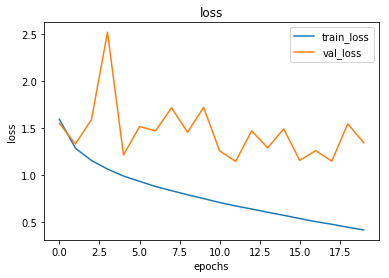

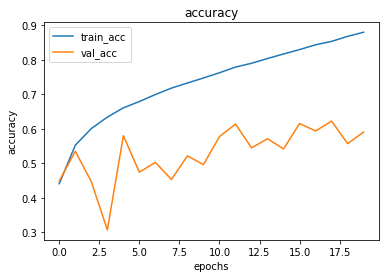

In [18]:

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('loss')
plt.show()

plt.plot(history.history['acc'], label = 'train_acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('accuracy')
plt.show()